In [1]:
from astropy.time import Time, TimeDelta
import astropy.units as u
import glob
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sunpy.coordinates.sun as sn
import scipy.ndimage as ndi
import scipy.stats as st
# Our own library for using spice with STEREO (https://github.com/LukeBarnard/stereo_spice)
from stereo_spice.coordinates import StereoSpice
# Local packages
import HUXt as H

spice = StereoSpice()


2454469.526941512
2454469.55221777
2454469.5243426426
2454469.551655934
2454469.525251665
2454469.548613362
2454469.527678937
2454469.5311249946
2454469.527770852
2454469.506428739


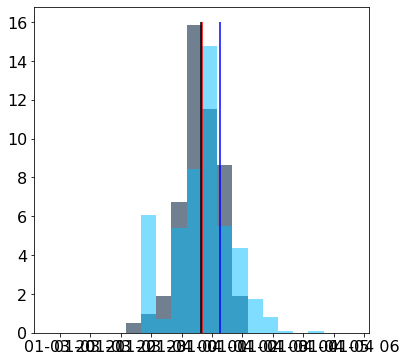

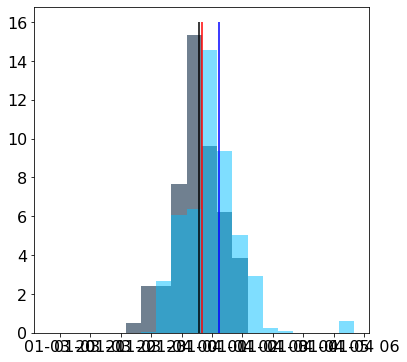

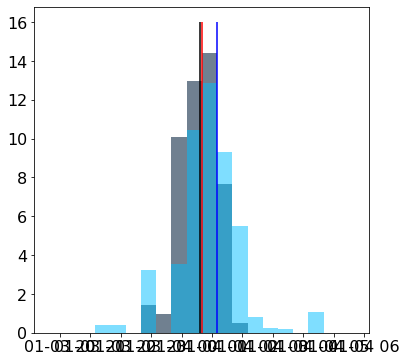

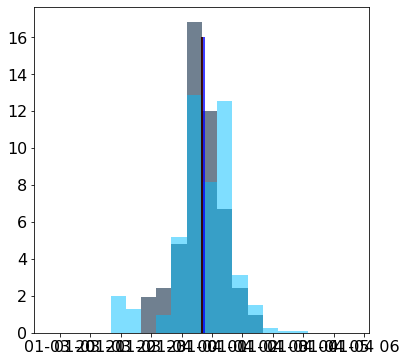

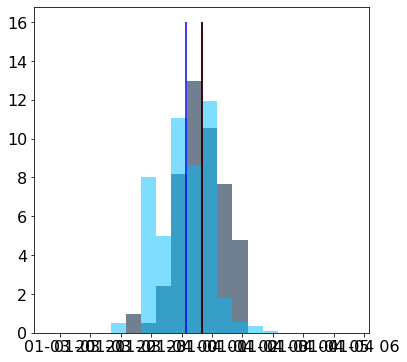

In [47]:
out_filenames = ["C:/Users/yq904481/research/repos/SIR_HUXt/code/SIR_HUXt_analysis_00.hdf5",
                "C:/Users/yq904481/research/repos/SIR_HUXt/code/SIR_HUXt_analysis_01.hdf5",
                "C:/Users/yq904481/research/repos/SIR_HUXt/code/SIR_HUXt_analysis_02.hdf5",
                "C:/Users/yq904481/research/repos/SIR_HUXt/code/SIR_HUXt_analysis_03.hdf5",
                "C:/Users/yq904481/research/repos/SIR_HUXt/code/SIR_HUXt_analysis_04.hdf5"]
  
for filename in out_filenames:
    out_file = h5py.File(filename, 'r')

    arrival_tru = Time(out_file["truth_arrival"][()], format='jd')

    analysis_keys = []
    for k in out_file.keys():
        if k.split("_")[0] =='analysis':
            analysis_keys.append(k)

    arr = out_file[analysis_keys[0] + "/arrivals"][()]
    arr[arr==1721059.5] = np.NaN
    id_good = np.isfinite(arr)
    arr_prior = arr[id_good]

    arr = out_file[analysis_keys[-1] + "/arrivals"][()]
    weight = out_file[analysis_keys[-1] + "/weights"][()]
    arr[arr==1721059.5] = np.NaN
    id_good = np.isfinite(arr)
    arr_post = arr[id_good]
    weight = weight[id_good]
    out_file.close()

    arr_prior = Time(arr_prior, format='jd')
    arr_post = Time(arr_post, format='jd')

    t_lo = arrival_tru - TimeDelta(5*60*60, format='sec')
    t_hi = arrival_tru + TimeDelta(5*60*60, format='sec')
    bins = pd.date_range(t_lo.datetime, t_hi.datetime, freq='0.5H')

    fig, ax = plt.subplots(figsize=(6,6))
    ax.hist(arr_prior.datetime, bins, color='slategrey', density=True)
    ax.hist(arr_post.datetime, bins, weights=weight, color='deepskyblue', alpha=0.5, density=True)
    ax.vlines(arrival_tru.datetime, 0, 16, 'r')

    mean_prior = Time(np.average(arr_prior.jd), format='jd')
    mean_post = Time(np.average(arr_post.jd, weights=weight), format='jd')
    ax.vlines(mean_prior.datetime, 0, 16, 'k')
    ax.vlines(mean_post.datetime, 0, 16, 'b')

    print(mean_prior)
    print(mean_post)

In [44]:
out_filename = "C:/Users/yq904481/research/repos/SIR_HUXt/code/SIR_HUXt_analysis_00.hdf5"
  
out_file = h5py.File(out_filename, 'r')

arrival_tru = Time(out_file["truth_arrival"][()], format='jd')

analysis_keys = []
for k in out_file.keys():
    if k.split("_")[0] =='analysis':
        analysis_keys.append(k)

for key in analysis_keys:    
    weight = out_file[key + "/weights"][()]
    print(1 / np.sum(weight**2))

96.92059394926217
61.31757289196766
85.83290661274589
82.50633489610802
86.06827278353187
72.72653126104342
49.23076300926141
36.72679276267207
nan


In [ ]:
        
arr = out_file[analysis_keys[0] + "/arrivals"][()]
arr[arr==1721059.5] = np.NaN
id_good = np.isfinite(arr)
arr = arr[id_good]
arrival_ens.append(np.mean(arr))

arr = out_file[analysis_keys[-1] + "/arrivals"][()]
weight = out_file[analysis_keys[-1] + "/weights"][()]
arr[arr==1721059.5] = np.NaN
id_good = np.isfinite(arr)
arr = arr[id_good]
weight = weight[id_good]
arrival_sir.append(np.average(arr, weights=weight))
out_file.close()
    
arrival_ens = Time(np.array(arrival_ens),format='jd')
arrival_sir = Time(np.array(arrival_sir), format='jd')
arrival_tru = Time(np.array(arrival_tru), format='jd')

ens_err = (arrival_ens - arrival_tru).jd*24
ens_rmse = np.sqrt(np.mean(ens_err**2))
sir_err = (arrival_sir - arrival_tru).jd*24
sir_rmse = np.sqrt(np.mean(sir_err**2))

print(np.mean(ens_err), np.mean(sir_err))
print(ens_rmse, sir_rmse)
print(ens_rmse/sir_rmse)

bins = np.arange(-4, 4, 0.5)
fig, ax = plt.subplots(figsize=(6, 6))
ax.hist(ens_err, bins, density=True, color='lightgrey', label='Prior', alpha=1.0)
ax.hist(sir_err, bins, density=True, color='deepskyblue', alpha=0.5, label='Analysis')
ax.set_xlabel('Arrival time error (hours)')
ax.set_ylabel('Frequency')
ax.legend()
